# Project Description:

In this project data from the Enron email dataset and public Enron financial data is used to create an classifier that allows to identify employes of Enron who may have committed fraud. The results found here can be used as a starting point for the identification of possible fraud in similar cases and in this way help to prevent and detect fraud.

The used data for analysis was provied by [Udacity](https://www.google.de/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwiAgMfxyYDTAhVFbxQKHRqrBjYQFggfMAA&url=https%3A%2F%2Fde.udacity.com%2F&usg=AFQjCNGjOkTqlePG4GsyvLxJqSfgnQk_wQ) and is a already preprocessed version oaf a subset of the Enron email dataset. It is already provided in the repository.

The original Enron email dataset is the May 7, 2015 Version which contains approximately 500,000 emails generated by employees of the Enron Corporation. It was obtained by the Federal Energy Regulatory Commission during its investigation of Enron's collapse.
It is provided by the [Carnegie Mellon School of Computer Science](https://www.cs.cmu.edu/~./enron/) and can be downloaded [here](https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tgzhttps://www.cs.cmu.edu/~./enron/)

## Point of Analyses

Identification of Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

# Project Preparation

## Import Libaries

In [1]:
import pickle
import _pickle as cPickle
from operator import itemgetter

from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Set Pandas Options

In [2]:
### Set max rows for displaying dataframes
pd.set_option('display.max_rows', 50)
### Set max columns for displaying dataframes
pd.set_option('display.max_columns', 500)

## Set Global Variables

In [3]:
### Link to the dataset
URL = "https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tgz"
### Path to the dataset on th local repository
PATH_DATASET = 'data/' + URL.split('/')[-1].split('.')[0]

## Load the Data

### Load the dataset

In [4]:
### Import the data provided by Udacity
enron_data = pickle.load(open("data/final_project_dataset.pkl", "rb"))

### Convert the dict in a pandas df
df_enron_data = pd.DataFrame.from_dict(enron_data, orient='index')

### Mark the NaN values in the data as NaN
df_enron_data = df_enron_data.replace('NaN', np.NaN)

### Display the data
display(df_enron_data.head(10))

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,NaN,4175000.0,phillip.allen@enron.com,-126027.0,-3081055.0,1729541.0,13868.0,47.0,1729541.0,2195.0,152.0,65.0,False,304805.0,1407.0,126027.0,NaN
BADUM JAMES P,NaN,NaN,178980.0,182466.0,NaN,NaN,NaN,NaN,NaN,257817.0,3486.0,NaN,257817.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,NaN,NaN,james.bannantine@enron.com,-560222.0,-5104.0,5243487.0,56301.0,39.0,4046157.0,29.0,864523.0,0.0,False,NaN,465.0,1757552.0,NaN
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,10623258.0,11200.0,NaN,6680544.0,NaN,2660303.0,NaN,False,1586055.0,NaN,3942714.0,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,frank.bay@enron.com,-82782.0,-201641.0,63014.0,129142.0,NaN,NaN,NaN,69.0,NaN,False,NaN,NaN,145796.0,NaN
BAZELIDES PHILIP J,80818.0,NaN,684694.0,860136.0,NaN,NaN,NaN,NaN,NaN,1599641.0,NaN,NaN,1599641.0,NaN,874.0,NaN,False,93750.0,NaN,NaN,NaN
BECK SALLY W,231330.0,7315.0,NaN,969068.0,NaN,700000.0,sally.beck@enron.com,NaN,NaN,126027.0,37172.0,144.0,NaN,4343.0,566.0,386.0,False,NaN,2639.0,126027.0,NaN
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,NaN,5249999.0,tim.belden@enron.com,NaN,-2334434.0,1110705.0,17355.0,228.0,953136.0,484.0,210698.0,108.0,True,NaN,5521.0,157569.0,NaN
BELFER ROBERT,NaN,NaN,-102500.0,102500.0,NaN,NaN,NaN,44093.0,NaN,-44093.0,NaN,NaN,3285.0,NaN,NaN,NaN,False,NaN,NaN,NaN,3285.0
BERBERIAN DAVID,216582.0,NaN,NaN,228474.0,NaN,NaN,david.berberian@enron.com,NaN,NaN,2493616.0,11892.0,NaN,1624396.0,NaN,NaN,NaN,False,NaN,NaN,869220.0,NaN


# Data Exploration

## Overview

In [5]:
display(df_enron_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
loan_advances                4 non-null float64
bonus                        82 non-null float64
email_address                111 non-null object
restricted_stock_deferred    18 non-null float64
deferred_income              49 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
from_poi_to_this_person      86 non-null float64
exercised_stock_options      102 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
long_term_incentive          66 non-null float6

None

## Point estimators

In [6]:
display(df_enron_data.describe())

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,9.500000e+01,86.000000,3.900000e+01,1.250000e+02,4.000000e+00,8.200000e+01,1.800000e+01,4.900000e+01,1.260000e+02,9.500000e+01,86.000000,1.020000e+02,86.000000,9.300000e+01,86.000000,6.600000e+01,86.000000,1.100000e+02,1.700000e+01
mean,5.621943e+05,2073.860465,1.642674e+06,5.081526e+06,4.196250e+07,2.374235e+06,1.664106e+05,-1.140475e+06,6.773957e+06,1.087289e+05,64.895349,5.987054e+06,608.790698,9.190650e+05,41.232558,1.470361e+06,1176.465116,2.321741e+06,1.668049e+05
std,2.716369e+06,2582.700981,5.161930e+06,2.906172e+07,4.708321e+07,1.071333e+07,4.201494e+06,4.025406e+06,3.895777e+07,5.335348e+05,86.979244,3.106201e+07,1841.033949,4.589253e+06,100.073111,5.942759e+06,1178.317641,1.251828e+07,3.198914e+05
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,4.000000e+05,7.000000e+04,-7.576788e+06,-2.799289e+07,-4.409300e+04,1.480000e+02,0.000000,3.285000e+03,12.000000,2.000000e+00,0.000000,6.922300e+04,2.000000,-2.604490e+06,3.285000e+03
25%,2.118160e+05,541.250000,8.157300e+04,3.944750e+05,1.600000e+06,4.312500e+05,-3.896218e+05,-6.948620e+05,4.945102e+05,2.261400e+04,10.000000,5.278862e+05,22.750000,1.215000e+03,1.000000,2.812500e+05,249.750000,2.540180e+05,9.878400e+04
50%,2.599960e+05,1211.000000,2.274490e+05,1.101393e+06,4.176250e+07,7.693750e+05,-1.469750e+05,-1.597920e+05,1.102872e+06,4.695000e+04,35.000000,1.310814e+06,41.000000,5.238200e+04,8.000000,4.420350e+05,740.500000,4.517400e+05,1.085790e+05
75%,3.121170e+05,2634.750000,1.002672e+06,2.093263e+06,8.212500e+07,1.200000e+06,-7.500975e+04,-3.834600e+04,2.949847e+06,7.995250e+04,72.250000,2.547724e+06,145.500000,3.620960e+05,24.750000,9.386720e+05,1888.250000,1.002370e+06,1.137840e+05
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,8.392500e+07,9.734362e+07,1.545629e+07,-8.330000e+02,4.345095e+08,5.235198e+06,528.000000,3.117640e+08,14368.000000,4.266759e+07,609.000000,4.852193e+07,5521.000000,1.303223e+08,1.398517e+06


## Number of data points

In [7]:
print(df_enron_data.shape[0])

146


## Number of features

In [8]:
### Column names
display(df_enron_data.columns)

### Number of columns
print(df_enron_data.shape[1])

Index(['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees'],
      dtype='object')

21


## Number of point of interests in the data

In [9]:
### Number of persons of interters (POI) in the dataset
poi = len(df_enron_data[df_enron_data['poi'] == True])
print('POI: ' + str(poi))

### Number of non persons of interters (POI) in the dataset
non_poi = len(df_enron_data[df_enron_data['poi'] == False])
print('non POI: ' + str(non_poi))

### Percentage of POI
poi_per = poi/df_enron_data.shape[0]
print('POI in %: ' + str(poi_per))

POI: 18
non POI: 128
POI in %: 0.1232876712328767


# Data Preprocessing

## Feature Selection

### Identify NaN values

#### NaN per columns

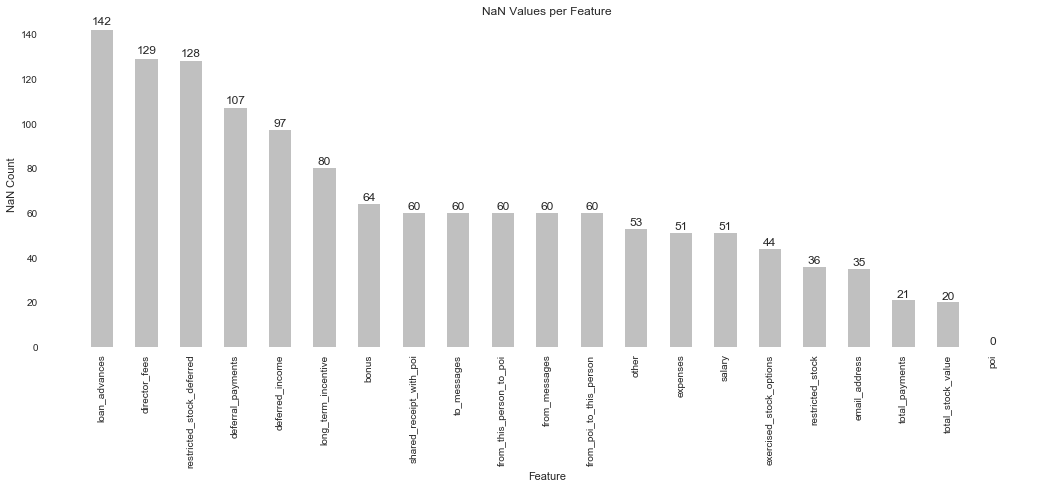

In [10]:
### Number of NaN per columns
df_enron_data_nan = df_enron_data.isnull().sum()
### Sort the column names by NaN count
df_enron_data_nan.sort_values(ascending=False,inplace=True)



### Plot 
bar_heights = df_enron_data_nan.values
bar_positions = np.arange(len(df_enron_data_nan.index))

### Create figure
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(6)

### Create bars
rect = ax.bar(bar_positions, bar_heights, .5, color='silver')

### Set axis labels and title
ax.set_title('NaN Values per Feature')
ax.set_xlabel('Feature')
ax.set_ylabel('NaN Count')

### Configure ticks and tick labels
ax.set_xticks(np.arange(len(df_enron_data_nan.index)))
ax.set_xticklabels(df_enron_data_nan.index, rotation=90)

### Set the maximum y axis value
ax.set_ylim([0,df_enron_data.shape[0]])

### Set background color
ax.set_facecolor('white')

### Remove frame lines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

### Set labels to the top of the bars
for position, height in enumerate(bar_heights):
    ax.text(rect[position].get_x() + rect[position].get_width() / 2., 1.01*height, str(height), ha='center', va='bottom')
    
### Show plot
plt.show()

#### Remove sparse columns

In [11]:
df_enron_data.drop(['loan_advances', 'director_fees', 'restricted_stock_deferred', 'deferral_payments'], inplace=True, axis=1)

#### NaN per rows

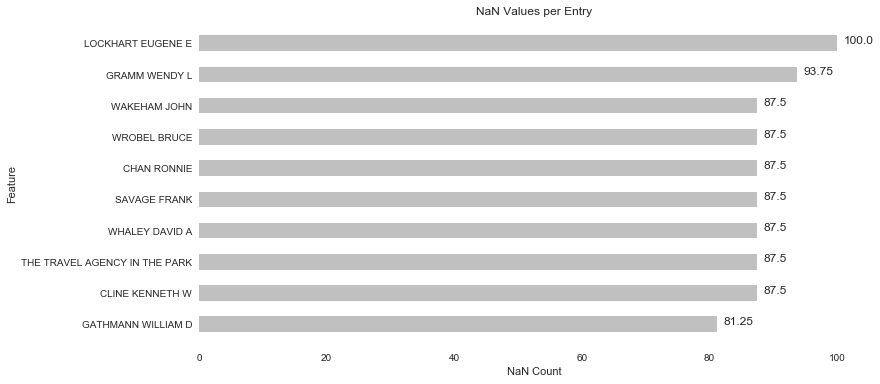

In [12]:
### Number of NA's per rows
df_enron_data_nan_rows = df_enron_data.isnull().sum(axis=1)

### Calculate percentage (removing one column as poi is always set)
df_enron_data_nan_rows = df_enron_data_nan_rows / (len(df_enron_data.columns)-1)*100

### Sort by NaN percentage
df_enron_data_nan_rows.sort_values(ascending=True,inplace=True)



### Plot 
bar_heights = df_enron_data_nan_rows[-10:].values
bar_positions = np.arange(len(df_enron_data_nan_rows.index[-10:]))

### Create figure
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)

### Create bars
rect = ax.barh(bar_positions, bar_heights, align='center',height= .5, color='silver')

### Set axis labels and title
ax.set_title('NaN Values per Entry')
ax.set_ylabel('Feature')
ax.set_xlabel('NaN Count')

### Configure ticks and tick labels
ax.set_yticks(np.arange(len(df_enron_data_nan_rows.index[-10:])))
ax.set_yticklabels(df_enron_data_nan_rows.index[-10:], rotation=0)

### Set background color
ax.set_facecolor('white')

### Remove frame lines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

### Set labels to the top of the bars
for position, height in enumerate(bar_heights):
    ax.text(height + 1, position , str(height))

### Show plot
plt.show()

#### Remove empty rows

In [13]:
df_enron_data.drop(['LOCKHART EUGENE E'], inplace=True)

#### Remove not person entries

In [14]:
### Found through visual invetigation
df_enron_data.drop(['THE TRAVEL AGENCY IN THE PARK'], inplace=True)

### Investigate outlier values

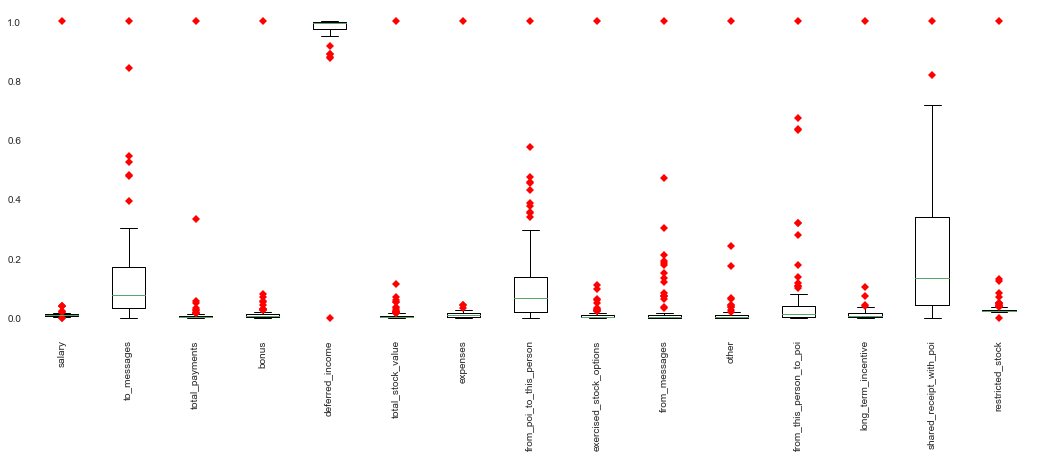

In [15]:
### Store feature with just numerical values in new df
df_box = df_enron_data.drop(['email_address','poi'], 1)

### Drop NaN values of the features and convert to numpy arrays
lst_box = [np.array(df_box[x].dropna()) for x in list(df_box)]

### Create rescaler
scaler = MinMaxScaler()

### Rescale features
lst_box = [scaler.fit_transform(x.reshape(-1, 1)) for x in lst_box]

#plt.figure()
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(6)

### Create Boxplot
ax.boxplot(lst_box, 0, 'rD')

### Set x-Labels
ax.set_xticklabels(df_box.columns, rotation=90)

### Set background color
ax.set_facecolor('white')

### Remove frame lines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

### Show plot
plt.show()

In [16]:
### Ivestigate the maximum values of the columns
display(df_box.idxmax(axis=0, skipna=True))

### Ivestigate the minimum values of the columns
#display(df_box.idxmin(axis=0, skipna=True))

salary                                   TOTAL
to_messages                  SHAPIRO RICHARD S
total_payments                           TOTAL
bonus                                    TOTAL
deferred_income             BOWEN JR RAYMOND M
total_stock_value                        TOTAL
expenses                                 TOTAL
from_poi_to_this_person        LAVORATO JOHN J
exercised_stock_options                  TOTAL
from_messages              KAMINSKI WINCENTY J
other                                    TOTAL
from_this_person_to_poi       DELAINEY DAVID W
long_term_incentive                      TOTAL
shared_receipt_with_poi       BELDEN TIMOTHY N
restricted_stock                         TOTAL
dtype: object

#### Remove outlier entries

In [17]:
### Drop the total row
df_enron_data.drop('TOTAL', inplace=True)

### Re-Investigate outlier values

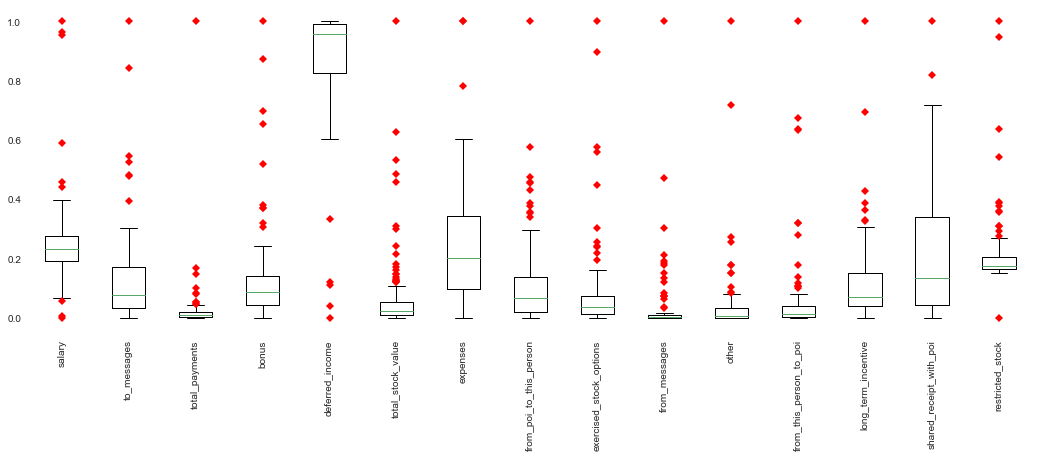

In [18]:
### Store feature with just numerical values in new df
df_box = df_enron_data.drop(['email_address','poi'], 1)

### Drop NaN values of the features and convert to numpy arrays
lst_box = [np.array(df_box[x].dropna()) for x in list(df_box)]

### Create rescaler
scaler = MinMaxScaler()

### Rescale features
lst_box = [scaler.fit_transform(x.reshape(-1, 1)) for x in lst_box]

#plt.figure()
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(6)

### Create Boxplot
ax.boxplot(lst_box, 0, 'rD')

### Set x-Labels
ax.set_xticklabels(df_box.columns, rotation=90)

### Set background color
ax.set_facecolor('white')

### Remove frame lines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

### Show plot
plt.show()

In [19]:
### Ivestigate the maximum values of the columns
display(df_box.idxmax(axis=0, skipna=True))

### Ivestigate the minimum values of the columns
#display(df_box.idxmin(axis=0, skipna=True))

salary                      SKILLING JEFFREY K
to_messages                  SHAPIRO RICHARD S
total_payments                   LAY KENNETH L
bonus                          LAVORATO JOHN J
deferred_income             BOWEN JR RAYMOND M
total_stock_value                LAY KENNETH L
expenses                      MCCLELLAN GEORGE
from_poi_to_this_person        LAVORATO JOHN J
exercised_stock_options          LAY KENNETH L
from_messages              KAMINSKI WINCENTY J
other                            LAY KENNETH L
from_this_person_to_poi       DELAINEY DAVID W
long_term_incentive            MARTIN AMANDA K
shared_receipt_with_poi       BELDEN TIMOTHY N
restricted_stock                 LAY KENNETH L
dtype: object

### General Selection

In [20]:
### Drop the email_address column
df_enron_data.drop('email_address', inplace=True, axis=1)

## Feature Engineering

### Create new feature fraction_to_poi

In [21]:
### Generate a new feature that represents the percentage of e-mails send to a POI
df_enron_data['fraction_to_poi'] = df_enron_data['from_this_person_to_poi'] / df_enron_data['to_messages']

### Set NaN fraction_to_poi in to 0
df_enron_data['fraction_to_poi'].fillna(0, inplace=True)

### Drop the base features for the new feature
df_enron_data.drop('from_this_person_to_poi', inplace=True, axis=1)
df_enron_data.drop('to_messages', inplace=True, axis=1)

### Print first 5 entries
print(df_enron_data['fraction_to_poi'].head())

ALLEN PHILLIP K       0.022398
BADUM JAMES P         0.000000
BANNANTINE JAMES M    0.000000
BAXTER JOHN C         0.000000
BAY FRANKLIN R        0.000000
Name: fraction_to_poi, dtype: float64


## Feature Scoring

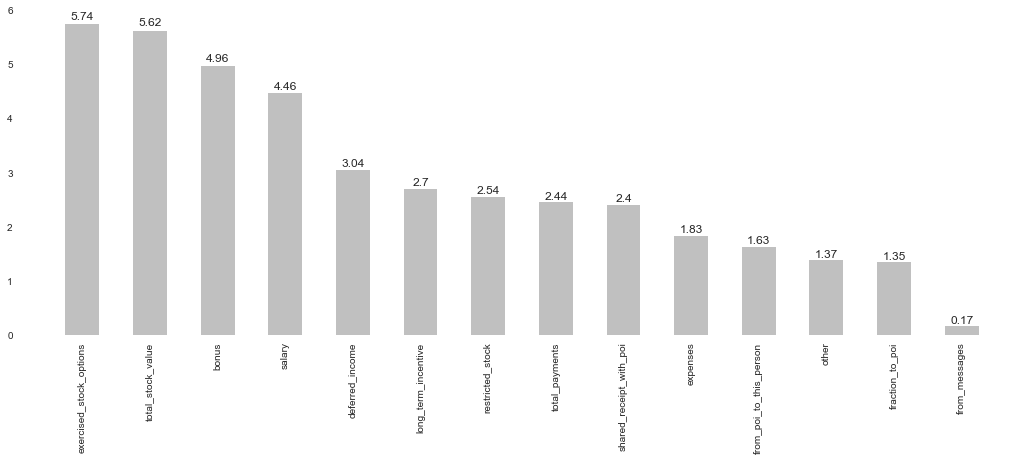

In [22]:
### Split data into features and labels
features_train = df_enron_data.drop(['poi'], axis=1)
labels_train = df_enron_data['poi']

### Set NaN to 0
features_train.fillna(0, inplace=True)
                                      
### Train the feature selector
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features_train, labels_train)

### Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

### Zip the scores with the feature name
zip_scores = zip(features_train.columns, scores)

### Sort zipped scores
sorted_zip_scores = sorted(zip_scores,key=itemgetter(1), reverse=True)



# Plot the scores
### Create fig
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(6)

### Set the height and position
bar_heights = list(map(itemgetter(1), sorted_zip_scores))
bar_positions = np.arange(len(features_train.columns))

### Create bars
rect = ax.bar(bar_positions, bar_heights, .5, color='silver')

### Set x-Labels
plt.xticks(bar_positions, map(itemgetter(0), sorted_zip_scores), rotation='vertical')

### Set background color
ax.set_facecolor('white')

### Remove frame lines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

### Set labels to the top of the bars
for position, height in enumerate(bar_heights):
    ax.text(rect[position].get_x() + rect[position].get_width() / 2., 1.01*height, str(round(height, 2)), ha='center', va='bottom')
    
### Show plot
plt.show()

## Reinvestigate Point estimators

In [23]:
display(df_enron_data.describe())

,salary,total_payments,bonus,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,long_term_incentive,shared_receipt_with_poi,restricted_stock,fraction_to_poi
count,9.400000e+01,1.230000e+02,8.100000e+01,4.800000e+01,1.250000e+02,94.000000,86.000000,1.010000e+02,86.000000,9.100000e+01,6.500000e+01,86.000000,1.090000e+02,143.000000
mean,2.840875e+05,2.641806e+06,1.201773e+06,-5.810498e+05,3.352073e+06,54192.010638,64.895349,2.959559e+06,608.790698,4.664105e+05,7.464912e+05,1176.465116,1.147424e+06,0.010376
std,1.771311e+05,9.524694e+06,1.441679e+06,9.420764e+05,6.532883e+06,46108.377454,86.979244,5.499450e+06,1841.033949,1.397376e+06,8.629174e+05,1178.317641,2.249770e+06,0.025443
min,4.770000e+02,1.480000e+02,7.000000e+04,-3.504386e+06,-4.409300e+04,148.000000,0.000000,3.285000e+03,12.000000,2.000000e+00,6.922300e+04,2.000000,-2.604490e+06,0.000000
25%,2.118020e+05,3.969340e+05,4.250000e+05,-6.112092e+05,4.941360e+05,22479.000000,10.000000,5.067650e+05,22.750000,1.203000e+03,2.750000e+05,249.750000,2.520550e+05,0.000000
50%,2.587410e+05,1.101393e+06,7.500000e+05,-1.519270e+05,1.095040e+06,46547.500000,35.000000,1.297049e+06,41.000000,5.158700e+04,4.221580e+05,740.500000,4.410960e+05,0.000000
75%,3.086065e+05,2.087530e+06,1.200000e+06,-3.792600e+04,2.606763e+06,78408.500000,72.250000,2.542813e+06,145.500000,3.319830e+05,8.318090e+05,1888.250000,9.850320e+05,0.008859
max,1.111258e+06,1.035598e+08,8.000000e+06,-8.330000e+02,4.911008e+07,228763.000000,528.000000,3.434838e+07,14368.000000,1.035973e+07,5.145434e+06,5521.000000,1.476169e+07,0.196896


# Classifier Comparison

Comparing the performane of the Gaussian Naive Bayes, SVM, Decission Tree, AdaBoost, Random Forest, k-Nearest Neighbors

## Classification Prepocessing Pipeline

In [24]:
def preprocess_normailzation(df):
    """Performs normalization on given data.

    Args:
        df, dataframe to preprocess
        
    Returns:
        dataframe containg preprocessed data
    """
        
    ### Initialize MinMaxScaler
    scaler = MinMaxScaler()
    
    ### Scale
    np_scaled = scaler.fit_transform(df)

    ### Return scaled values as df
    return pd.DataFrame(np_scaled)

In [25]:
def preprocess_feature_select(features, labels, k):
    """Performs K-Best feature selection on given data.

    Args:
        features, dataframe or numpy array to preprocess
        labels, dataframe or numpy array conating the labels
        k, Int specifies number of selected features used in features selection 
        
    Returns:
        numpy array containg preprocessed data
    """
        
    ### Train the feature selector
    selector = SelectKBest(f_classif, k = k)
    
    ### Perform feature selection
    selector.fit(features, labels)
  
    ### Select the features
    return selector.transform(features)

In [26]:
def preprocess_pca(df, n=3):
    """Performs pca on given data.

    Args:
        df, dataframe or numpy array to preprocess
        n, Int specifies number of components used in pca
        
    Returns:
        numpy array containg preprocessed data
    """
    
    ### Initialize PCA
    pca = PCA(n_components=n)
    
    ### Perform dimension reduction
    pca.fit(df)

    ### Retrun reduced dimensions
    return pca.transform(df)

In [27]:
def preprocess(df, norm_param=False, pca_param=False, pca_k=3, feat_k='all'):
    """ Preprocess the input dataframe by perform spcified preprocessing steps
        and splits the df into features and labels.
        Preprocessing steps:
        - set NaN's to 0
        - normalization
        - pca
        - feature selection

    Args:
        df, dataframe to preprocess
        norm_param, Bool set normalization preprocessing active or not
        pca_param, Bool set pca preprocessing active or not
        pca_k, Int specifies number of components used in pca
        feat_k, Int specifies number of selected features used in features selection

    Returns:
        features_train, numpy array containg the features
        df_labels_train, series containg the labels
    """
    
    ### Copd df
    df = df.copy()
    
    ### Set NaN to 0
    df.fillna(0, inplace=True)
    
    ### Split in features and labels
    features_train = df.drop(['poi'], axis=1)
    df_labels_train = df['poi']
    
    ###Normlization
    if norm_param == True:   
        ### Normalize the features
        features_train = preprocess_normailzation(features_train)
    
    ### Train the feature selector
    features_train = preprocess_feature_select(features_train,
                                                  df_labels_train,
                                                  feat_k)
    ### PCA
    if pca_param == True:
        ### Perform PCA with n=3
        features_train = preprocess_pca(features_train, n=pca_k)
        
    ### Return preprocessed features
    return features_train, df_labels_train

## Classifier functions

### Gaussian Naive Bayes

In [28]:
def classifier_gnb(df, norm_param=False, pca_param=False, pca_k=3, feat_k='all'):
    """ Evalutes algorithm after preprocessing to given data, 
        with given preprocessing steps.
        Usefull preproceing steps:
        - PCA

    Args:
        df, dataframe for performing the algorithm
        norm_param, Bool set normalization preprocessing active or not
        pca_param, Bool set pca preprocessing active or not
        pca_k, Int specifies number of components used in pca
        feat_k, Int specifies number of selected features used in features selection

    Returns:
        results_list, list containing the name of the classifer, 
            best evaluted params, F2-Score for best params, preprocessing coniguration
    """
    
    ### Prepocess the data
    features, labels = preprocess(df,
                                  norm_param = norm_param,
                                  pca_param = pca_param,
                                  pca_k = pca_k,
                                  feat_k = feat_k)
    
    ### Set the parameters for the algorithm
    parameters = {}
    
    ### Initialize the algorithm
    gnb = GaussianNB()
    
    ### Create scorer for F-Score
    ftwo_scorer = make_scorer(fbeta_score, beta=2)
    
    ### Initialize GridSearch
    clf = GridSearchCV(gnb, parameters, cv=10, scoring=ftwo_scorer, refit=False)

    ### Perform GridSearch
    clf.fit(features, labels)
    
    ### Store best results 
    results_list = []
    results_list.append('Naive Bayes')
    results_list.append(clf.best_score_)
    results_list.append(clf.best_params_)
    results_list.append(feat_k)
    results_list.append(norm_param)
    results_list.append(pca_param)
    results_list.append(pca_k)
    
    ### Return best results
    return results_list

### SVM

In [29]:
def classifier_svm(df, norm_param=True, pca_param=False, pca_k=None, feat_k='all'):
    """ Evalutes algorithm after preprocessing to given data, 
        with given preprocessing steps.
        Usefull preproceing steps:
        - Normalization

    Args:
        df, dataframe for performing the algorithm
        norm_param, Bool set normalization preprocessing active or not
        pca_param, Bool set pca preprocessing active or not
        pca_k, Int specifies number of components used in pca
        feat_k, Int specifies number of selected features used in features selection

    Returns:
        results_list, list containing the name of the classifer, 
            best evaluted params, F2-Score for best params, preprocessing coniguration
    """
    
    ### Prepocess the data
    features, labels = preprocess(df,
                                  norm_param = norm_param,
                                  pca_param = pca_param,
                                  pca_k = pca_k,
                                  feat_k = feat_k)

    ### Set the parameters for the algorithm
    parameters = {'kernel':('linear', 'rbf'),
                  'gamma': [1e-3, 1e-4],
                  'C':[1, 10, 100, 1000]}
    
    ### Initialize the algorithm
    svm = SVC()
    
    ### Create scorer for F-Score
    ftwo_scorer = make_scorer(fbeta_score, beta=2)
    
    ### Initialize GridSearch
    clf = GridSearchCV(svm, parameters, cv=10, scoring=ftwo_scorer, refit=False)

    ### Perform GridSearch
    clf.fit(features, labels)
    
    ### Store best results 
    results_list = []
    results_list.append('SVM')
    results_list.append(clf.best_score_)
    results_list.append(clf.best_params_)
    results_list.append(feat_k)
    results_list.append(norm_param)
    results_list.append(pca_param)
    results_list.append(pca_k)
    
    ### Return best results
    return results_list

### Decission Tree

In [30]:
def classifier_dt(df, norm_param=False, pca_param=True, pca_k=3, feat_k='all'):
    """ Evalutes algorithm after preprocessing to given data, 
        with given preprocessing steps.
        Usefull preproceing steps:
        - PCA

    Args:
        df, dataframe for performing the algorithm
        norm_param, Bool set normalization preprocessing active or not
        pca_param, Bool set pca preprocessing active or not
        pca_k, Int specifies number of components used in pca
        feat_k, Int specifies number of selected features used in features selection

    Returns:
        results_list, list containing the name of the classifer, 
            best evaluted params, F2-Score for best params, preprocessing coniguration
    """
        
    ### Prepocess the data
    features, labels = preprocess(df,
                                  norm_param = norm_param,
                                  pca_param = pca_param,
                                  pca_k = pca_k,
                                  feat_k = feat_k)

    ### Set the parameters for the algorithm
    parameters = {"max_depth": [3, None],
              #"max_features": [1,3,5,7,9],
              "min_samples_leaf": [1,3,5,7,9],
              "criterion": ["gini", "entropy"]}
    
    ### Initialize the algorithm
    dt = DecisionTreeClassifier()
    
    ### Create scorer for F-Score
    ftwo_scorer = make_scorer(fbeta_score, beta=2)
    
    ### Initialize GridSearch
    clf = GridSearchCV(dt, parameters, cv=10, scoring=ftwo_scorer, refit=False)

    ### Perform GridSearch
    clf.fit(features, labels)
    
    ### Store best results 
    results_list = []
    results_list.append('Decission Tree')
    results_list.append(clf.best_score_)
    results_list.append(clf.best_params_)
    results_list.append(feat_k)
    results_list.append(norm_param)
    results_list.append(pca_param)
    results_list.append(pca_k)
    
    ### Return best results
    return results_list

### AdaBoost

In [31]:
def classifier_ab(df, norm_param=False, pca_param=False, pca_k=3, feat_k='all'):
    """ Evalutes algorithm after preprocessing to given data, 
        with given preprocessing steps.
        Usefull preproceing steps:
        - PCA

    Args:
        df, dataframe for performing the algorithm
        norm_param, Bool set normalization preprocessing active or not
        pca_param, Bool set pca preprocessing active or not
        pca_k, Int specifies number of components used in pca
        feat_k, Int specifies number of selected features used in features selection

    Returns:
        results_list, list containing the name of the classifer, 
            best evaluted params, F2-Score for best params, preprocessing coniguration
    """
    
    ### Prepocess the data
    features, labels = preprocess(df,
                                  norm_param = norm_param,
                                  pca_param = pca_param,
                                  pca_k = pca_k,
                                  feat_k = feat_k)
    ### Set the parameters for the algorithm
    parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]}
    
    ### Initialize the tree algorithm
    dt = DecisionTreeClassifier()
    ### Initialize the ensemble algorithm
    ab = AdaBoostClassifier(DecisionTreeClassifier())
    
    
    ### Create scorer for F-Score
    ftwo_scorer = make_scorer(fbeta_score, beta=2)
    
    ### Initialize GridSearch
    clf = GridSearchCV(ab, parameters, cv=10, scoring=ftwo_scorer, refit=False)

    ## Perform GridSearch
    clf.fit(features, labels)
    
    ### Store best results 
    results_list = []
    results_list.append('AdaBoost')
    results_list.append(clf.best_score_)
    results_list.append(clf.best_params_)
    results_list.append(feat_k)
    results_list.append(norm_param)
    results_list.append(pca_param)
    results_list.append(pca_k)
    
    ### Return best results
    return results_list

### Random Forest

In [32]:
def classifier_rf(df, norm_param=False, pca_param=False, pca_k=3, feat_k='all'):
    """ Evalutes algorithm after preprocessing to given data, 
        with given preprocessing steps.
        Usefull preproceing steps:
        - -

    Args:
        df, dataframe for performing the algorithm
        norm_param, Bool set normalization preprocessing active or not
        pca_param, Bool set pca preprocessing active or not
        pca_k, Int specifies number of components used in pca
        feat_k, Int specifies number of selected features used in features selection

    Returns:
        results_list, list containing the name of the classifer, 
            best evaluted params, F2-Score for best params, preprocessing coniguration
    """
    ### Prepocess the data
    features, labels = preprocess(df,
                                  norm_param = norm_param,
                                  pca_param = pca_param,
                                  pca_k = pca_k,
                                  feat_k = feat_k)
    
    ### Set the parameters for the algorithm
    parameters = {"n_estimators": [1,5,10,50,100,200,500],
              "max_depth": [3, None],
              #"max_features": [1,3,5,7,9],
              "min_samples_leaf": [1,5,10,50,100,200,500],
              "criterion": ["gini", "entropy"]}
    
    ### Initialize the algorithm
    rf = RandomForestClassifier()
    
    ## Create scorer for F-Score
    ftwo_scorer = make_scorer(fbeta_score, beta=2)
    
    ### Initialize GridSearch
    clf = GridSearchCV(rf, parameters, cv=10, scoring=ftwo_scorer, refit=False)

    ### Perform GridSearch
    clf.fit(features, labels)
    
    ### Store best results 
    results_list = []
    results_list.append('Random Forest')
    results_list.append(clf.best_score_)
    results_list.append(clf.best_params_)
    results_list.append(feat_k)
    results_list.append(norm_param)
    results_list.append(pca_param)
    results_list.append(pca_k)
    
    ### Return best results
    return results_list

### k-Nearest Neighbors

In [33]:
def classifier_kNN(df, norm_param=False, pca_param=False, pca_k=3, feat_k='all'):
    """ Evalutes algorithm after preprocessing to given data, 
        with given preprocessing steps.
        Usefull preproceing steps:
        - PCA
        - Normalization

    Args:
        df, dataframe for performing the algorithm
        norm_param, Bool set normalization preprocessing active or not
        pca_param, Bool set pca preprocessing active or not
        pca_k, Int specifies number of components used in pca
        feat_k, Int specifies number of selected features used in features selection

    Returns:
        results_list, list containing the name of the classifer, 
            best evaluted params, F2-Score for best params, preprocessing coniguration
    """
    
    ### Prepocess the data
    features, labels = preprocess(df,
                                  norm_param = norm_param,
                                  pca_param = pca_param,
                                  pca_k = pca_k,
                                  feat_k = feat_k) 
    
    ## Set the parameters for the algorithm
    parameters = {"n_neighbors": np.arange(1, 10, 1),
                  "weights": ["uniform", "distance"],
                  "metric": ["euclidean", "cityblock", "minkowski"]}

     ### Initialize the algorithm
    kNN = KNeighborsClassifier()
    
    ### Create scorer for F-Score
    ftwo_scorer = make_scorer(fbeta_score, beta=2)
    
    ### Initialize GridSearch
    clf = GridSearchCV(kNN, parameters, cv=10, scoring=ftwo_scorer, refit=False)

    ### Perform GridSearch
    clf.fit(features, labels)
    
    ### Store best results 
    results_list = []
    results_list.append('k-Nearest Neighbors')
    results_list.append(clf.best_score_)
    results_list.append(clf.best_params_)
    results_list.append(feat_k)
    results_list.append(norm_param)
    results_list.append(pca_param)
    results_list.append(pca_k)
    
    ### Return best results
    return results_list

## Compare the Classifier

In [34]:
import warnings
warnings.filterwarnings('ignore')

### Intizalize list of results
best_results_list = []

### Test the classifiers

In [35]:
### Run Classifier and store results
for features in range(4,10):
    for pca in [True, False]:
        for pca_k in [ 1, 2, 3]:
            ### Naive Bayes
            result_gnb = classifier_gnb(df_enron_data,
                                        norm_param = False,
                                        pca_param= pca,
                                        pca_k = pca_k,
                                        feat_k = features)
            best_results_list.append(result_gnb)

            ### SVM
            result_svm = classifier_svm(df_enron_data,
                                        norm_param = True,
                                        pca_param= pca,
                                        pca_k = pca_k,
                                        feat_k = features)
            best_results_list.append(result_svm)

            ### Decision Tree
            result_dt = classifier_dt(df_enron_data,
                                        norm_param = False,
                                        pca_param= pca,
                                        pca_k = pca_k,
                                        feat_k = features)
            best_results_list.append(result_dt)

            ### AdaBoost
            result_ab = classifier_ab(df_enron_data,
                                        norm_param = False,
                                        pca_param= pca,
                                        pca_k = pca_k,
                                        feat_k = features)
            best_results_list.append(result_ab)

            ### Random Forest
            result_rf = classifier_rf(df_enron_data,
                                        norm_param = False,
                                        pca_param= pca,
                                        pca_k = pca_k,
                                        feat_k = features)
            best_results_list.append(result_rf)

            ### k-Nearest Neighbors
            result_kNN = classifier_kNN(df_enron_data,
                                        norm_param = True,
                                        pca_param= pca,
                                        pca_k = pca_k,
                                        feat_k = features)
            best_results_list.append(result_kNN)

### Construct the results dataframe

In [36]:
### Results list to df
results_df = pd.DataFrame(best_results_list)

### Set the column labels
results_df.columns = ['Classifier',
                   'F2-Score',
                   'BestParameters', 
                   'FeatureNumber',
                   'Normalized',
                   'PCA',
                   'PCAComponents']

### Store or load results in or from file

In [37]:
### Write results df to file
results_df.to_csv('data/results.csv')

### Read results df from file
#results_df = pd.read_csv('data/results.csv')

### Print first lines of results
display(results_df.head())
print('Best Results for:')
print(results_df.ix[results_df['F2-Score'].idxmax()])

,Classifier,F2-Score,BestParameters,FeatureNumber,Normalized,PCA,PCAComponents
0,Naive Bayes,0.337995,{},4,False,True,1
1,SVM,0.000000,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",4,True,True,1
2,Decission Tree,0.263070,"{'criterion': 'gini', 'max_depth': None, 'min_...",4,False,True,1
3,AdaBoost,0.308883,"{'base_estimator__criterion': 'gini', 'base_es...",4,False,True,1
4,Random Forest,0.322935,"{'criterion': 'gini', 'max_depth': None, 'min_...",4,False,True,1


Best Results for:
Classifier                                           Decission Tree
F2-Score                                                   0.561772
BestParameters    {'criterion': 'gini', 'max_depth': 3, 'min_sam...
FeatureNumber                                                     4
Normalized                                                    False
PCA                                                            True
PCAComponents                                                     3
Name: 14, dtype: object


### Plot the F2-Score for different number of features

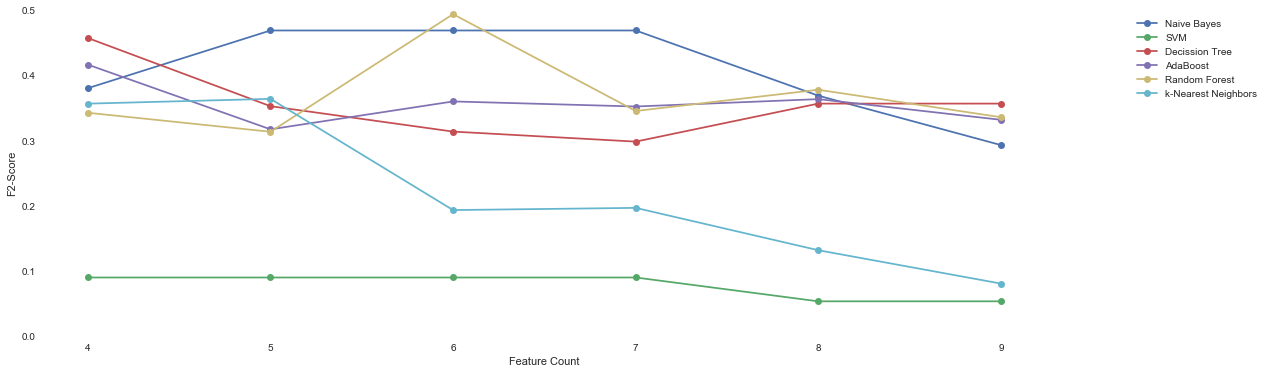

In [41]:
### Chart for F2-Score for different numbers of features
results_df_noPCA = results_df[(results_df['PCA'] == False) & (results_df['PCAComponents'] == 3)]

### Create fig
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(6)

### Draw lines
for algo in results_df_noPCA['Classifier'].unique():
    results_df_filtered = results_df_noPCA[results_df_noPCA['Classifier'] == algo]
    ax.plot(results_df_filtered['FeatureNumber'].unique(),
            results_df_filtered['F2-Score'].values,
            label = algo,
            marker = 'o')

### Set y-axis height
ax.set_ylim([0,0.5])

### Set axis labels and title
ax.set_ylabel('F2-Score')
ax.set_xlabel('Feature Count')

### Plot legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))

### Set background color
ax.set_facecolor('white')

### Remove frame lines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

### Show plot
plt.show()

### Plot the score for PCA usage

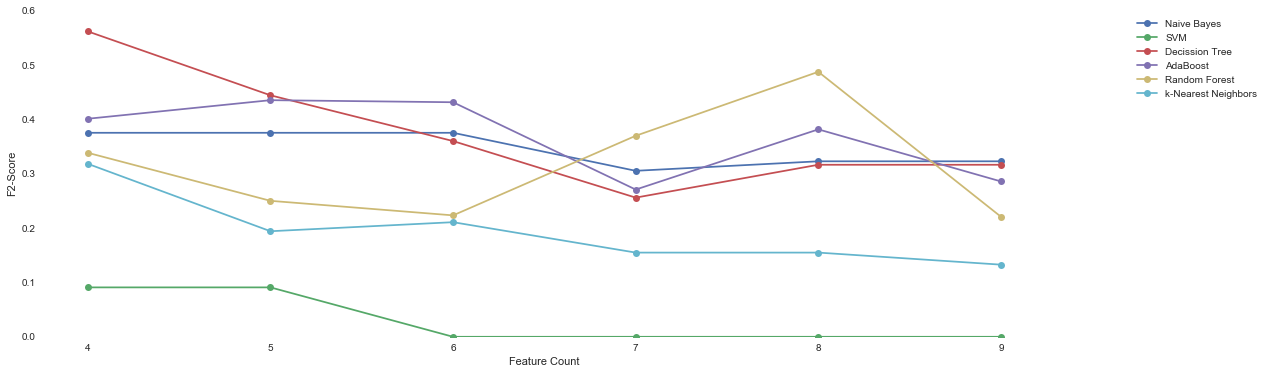

In [45]:
### Chart for F2-Score with PCA
results_df_PCA = results_df[(results_df['PCA'] == True) & (results_df['PCAComponents'] == 3)]

### Create fig
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(6)

### Draw lines
for algo in results_df_PCA['Classifier'].unique():
    results_df_filtered = results_df_PCA[results_df_PCA['Classifier'] == algo]
    ax.plot(results_df_filtered['FeatureNumber'].unique(),
            results_df_filtered['F2-Score'].values,
            label = algo,
            marker = 'o')

### Set y-axis height
ax.set_ylim([0,0.6])

### Set axis labels and title
ax.set_ylabel('F2-Score')
ax.set_xlabel('Feature Count')

### Plot legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))

### Set background color
ax.set_facecolor('white')

### Remove frame lines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid('on')

### Show plot
plt.show()

# Final Algorithm

In [46]:
### Prepocess the data
features, labels = preprocess(df_enron_data,
                              norm_param = False,
                              pca_param = True,
                              pca_k = 3,
                              feat_k = 4)

### Create scorer for F-Score
ftwo_scorer = make_scorer(fbeta_score, beta=2)

### Intizialize scorer list
scorer_list = ['accuracy', 'recall', 'precision', 'f1', ftwo_scorer]

### Intizalize list of results
final_results_list = []

### Set the parameters for the algorithm
parameters = {}

### Set the parameters for the algorithm
parameters = {"max_depth": [3],
          "min_samples_leaf": [1],
          "criterion": ["gini"]}

### Initialize the algorithm
dt = DecisionTreeClassifier()

for scorer in scorer_list:
    ### Initialize GridSearch
    clf = GridSearchCV(dt, parameters, cv=10, scoring=scorer, refit=False)

    ### Perform GridSearch
    clf.fit(features, labels)
    
    final_results_list.append(clf.best_score_)

### Results list to df
final_results_df = pd.DataFrame(final_results_list).transpose()
### Set the column labels
final_results_df.columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'F2']

### Print Results
display(final_results_df)

,Accuracy,Recall,Precision,F1,F2
0,0.916084,0.555944,0.608392,0.573427,0.561772


## Plot final scores

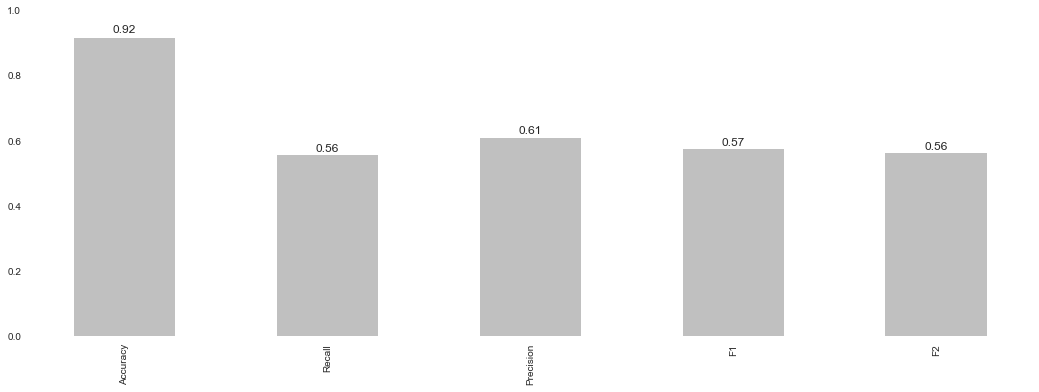

In [47]:
### Create fig
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(6)

### Set the height and position
bar_heights = final_results_df.ix[0]
bar_positions = np.arange(len(final_results_df.columns))

### Create bars
rect = ax.bar(bar_positions, bar_heights, .5, color='silver')

### Set x-Labels
plt.xticks(bar_positions, final_results_df.columns, rotation='vertical')

### Set y-axis height
ax.set_ylim([0,1])

### Set background color
ax.set_facecolor('white')

### Remove frame lines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

### Set labels to the top of the bars
for position, height in enumerate(bar_heights):
    ax.text(rect[position].get_x() + rect[position].get_width() / 2., 1.01*height, str(round(height, 2)), ha='center', va='bottom')
    
### Show plot
plt.show()